<a href="https://colab.research.google.com/github/p3dr0id/circular_economy_thermodynamics/blob/main/circular_economy_thermodynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path_planilha_mt = '/content/drive/MyDrive/Pesquisa/Artigo Gabriela Brito/Dados-artigo-MT-Pandas.xlsx'
df0 = pd.read_excel(path_planilha_mt, 'Fab-Pd')
df0.head()

,PERIODO,ELETRICIDADE (kWh),Biodiesel (kWh),Diesel S10 (kWh),Gasolina misturada álcool (kWh),MILHO EM GRÃOS PENEIRADOS (KG),FARELO DE SOJA (KG),FARINHA DE CARNE BALANCEADA (KG),SORGO A GRANEL (KG),CALCARIO CALCITICO (GROSSO) (KG),CALCARIO CALCITICO (FINO) (KG),FARELO DE TRIGO (KG),SAL MOIDO (KG),BIOBOND (KG),METIONINA LIQUIDA (KG),CASCA DE SOJA (KG),OLEO DE SOJA DEGOMADO (KG),SOJA EM GRAOS (KG),MEDICAMENTOS/AMINOACIDOS (KG),UREIA (KG),FOSFATO (KG),NÚCLEO PARA RAÇÃO (KG),Ração (Kg),Ração (Kg).1,Sucata de papelão (Kg),Sucata de plástico (Kg),Farelo de milho (Kg),Óleo queimado (Kg),Sucata de ferro (Kg),CO2 (kg)
0,1.0,383865.65,114204.984304,0.000000,17515.433344,5.793992e+06,1576134.5,171317.5,698266.500000,98547.0,104323.0,50215.5,43865.5,4740.0,30999.3,149240.0,88876.5,963914.71,28526.70,11250.0,72093.5,149495.0,8329568.05,2469261.95,0.0,2080.0,2380.0,0.0,0.0,0
1,2.0,327695.38,108524.384810,2602.213671,18426.557912,4.685938e+06,1259916.5,186856.5,568744.500000,78448.0,74657.0,47544.0,24158.2,3750.0,26109.5,47340.5,49145.5,766504.02,21534.60,3275.0,45694.0,121655.0,6602302.08,1839607.92,0.0,0.0,5082.0,400.0,23420.0,0
2,3.0,353356.33,112386.130633,1270.196962,17144.852202,5.820610e+06,1356828.5,243034.0,427097.000000,86930.0,85751.5,42073.0,36303.3,5270.0,32658.2,103488.5,61573.0,1132878.71,22627.60,7425.0,46196.5,146625.0,9150424.57,943545.43,0.0,0.0,5040.0,0.0,0.0,0
3,4.0,392362.25,104670.205063,939.949367,18036.664992,5.787403e+06,1420588.5,288964.0,660331.500000,84285.0,101010.5,46379.0,48126.6,6030.0,37164.7,178671.5,62788.0,1453102.06,27893.55,12075.0,51502.0,166295.0,8996774.81,1920831.19,0.0,0.0,4580.0,0.0,0.0,0
4,5.0,379497.65,127717.040506,2170.560000,20250.228059,5.589680e+06,1221413.0,228380.5,625603.843517,81943.0,103397.0,46473.5,48089.0,3750.0,34150.7,166630.0,49470.0,1493505.55,27315.90,14250.0,57714.5,153015.0,9240591.02,1415778.98,0.0,0.0,8080.0,0.0,0.0,0


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PERIODO                           10 non-null     float64
 1   ELETRICIDADE (kWh)                10 non-null     float64
 2   Biodiesel (kWh)                   10 non-null     float64
 3   Diesel S10 (kWh)                  10 non-null     float64
 4   Gasolina misturada álcool (kWh)   10 non-null     float64
 5   MILHO EM GRÃOS PENEIRADOS (KG)    10 non-null     float64
 6   FARELO DE SOJA (KG)               10 non-null     float64
 7   FARINHA DE CARNE BALANCEADA (KG)  10 non-null     float64
 8   SORGO A GRANEL (KG)               10 non-null     float64
 9   CALCARIO CALCITICO (GROSSO) (KG)  10 non-null     float64
 10  CALCARIO CALCITICO (FINO) (KG)    10 non-null     float64
 11  FARELO DE TRIGO (KG)              10 non-null     float64
 12  SAL MOIDO (

In [ ]:
df0.iloc[:,1:5]

,ELETRICIDADE (kWh),Biodiesel (kWh),Diesel S10 (kWh),Gasolina misturada álcool (kWh)
0,383865.65,114204.984304,0.000000,17515.433344
1,327695.38,108524.384810,2602.213671,18426.557912
2,353356.33,112386.130633,1270.196962,17144.852202
3,392362.25,104670.205063,939.949367,18036.664992
4,379497.65,127717.040506,2170.560000,20250.228059
5,357351.58,126503.240506,0.000000,16429.920392
6,365417.68,145229.794937,0.000000,17921.749429
7,349850.90,133667.591392,199.274430,18225.333377
8,342550.00,145245.185316,0.000000,19363.726591
9,327021.28,135624.183797,0.000000,19973.363785


In [ ]:
Et = df0.iloc[:,1:5].sum(axis=1)
Et

0    515586.067648
1    457248.536393
2    484157.509797
3    516009.069422
4    529635.478565
5    500284.740898
6    528569.224366
7    501943.099200
8    507158.911907
9    482618.827582
dtype: float64

In [ ]:
df0.iloc[:,5:22]

,MILHO EM GRÃOS PENEIRADOS (KG),FARELO DE SOJA (KG),FARINHA DE CARNE BALANCEADA (KG),SORGO A GRANEL (KG),CALCARIO CALCITICO (GROSSO) (KG),CALCARIO CALCITICO (FINO) (KG),FARELO DE TRIGO (KG),SAL MOIDO (KG),BIOBOND (KG),METIONINA LIQUIDA (KG),CASCA DE SOJA (KG),OLEO DE SOJA DEGOMADO (KG),SOJA EM GRAOS (KG),MEDICAMENTOS/AMINOACIDOS (KG),UREIA (KG),FOSFATO (KG),NÚCLEO PARA RAÇÃO (KG)
0,5.793992e+06,1576134.5,171317.5,698266.500000,98547.0,104323.0,50215.5,43865.5,4740.0,30999.3,149240.0,88876.5,9.639147e+05,28526.700,11250.0,72093.5,149495.0
1,4.685938e+06,1259916.5,186856.5,568744.500000,78448.0,74657.0,47544.0,24158.2,3750.0,26109.5,47340.5,49145.5,7.665040e+05,21534.600,3275.0,45694.0,121655.0
2,5.820610e+06,1356828.5,243034.0,427097.000000,86930.0,85751.5,42073.0,36303.3,5270.0,32658.2,103488.5,61573.0,1.132879e+06,22627.600,7425.0,46196.5,146625.0
3,5.787403e+06,1420588.5,288964.0,660331.500000,84285.0,101010.5,46379.0,48126.6,6030.0,37164.7,178671.5,62788.0,1.453102e+06,27893.550,12075.0,51502.0,166295.0
4,5.589680e+06,1221413.0,228380.5,625603.843517,81943.0,103397.0,46473.5,48089.0,3750.0,34150.7,166630.0,49470.0,1.493506e+06,27315.900,14250.0,57714.5,153015.0
5,5.091598e+06,1059249.5,222724.5,573063.399089,80523.5,86829.0,39932.5,39694.1,4630.0,31186.7,130875.5,52911.5,1.369427e+06,26354.250,10125.0,46003.0,140045.0
6,5.580736e+06,1235682.5,275959.0,636078.939052,82724.5,101058.0,36260.0,48760.3,3990.0,34995.9,215405.0,60002.0,1.274588e+06,25414.732,13225.0,49657.5,155310.0
7,5.528072e+06,1185380.0,251455.0,607822.657980,92930.5,114101.5,43591.0,59044.1,4520.0,35464.1,346214.5,61629.0,1.217968e+06,28937.316,19325.0,62947.0,157940.0
8,5.009880e+06,1291497.0,264575.0,591038.904899,76716.5,104616.5,51086.0,54114.3,3870.0,33297.0,82429.0,59557.0,1.184336e+06,26735.032,20500.0,50907.5,146130.0
9,5.523602e+06,1413247.5,281608.0,636023.754443,88032.5,116558.5,49595.5,55868.3,3920.0,35798.8,291233.5,66609.0,1.274478e+06,27991.376,25050.0,60065.5,160625.0


In [ ]:
Qp = df0.iloc[:,5:22].sum(axis=1)
Qp

0    1.003580e+07
1    8.011270e+06
2    9.657369e+06
3    1.043261e+07
4    9.944781e+06
5    9.005173e+06
6    9.829847e+06
7    9.817341e+06
8    9.051286e+06
9    1.011031e+07
dtype: float64

In [ ]:
df0.iloc[:,22:]

,Ração (Kg),Ração (Kg).1,Sucata de papelão (Kg),Sucata de plástico (Kg),Farelo de milho (Kg),Óleo queimado (Kg),Sucata de ferro (Kg),CO2 (kg)
0,8329568.05,2469261.95,0.0,2080.0,2380.0,0.0,0.0,0
1,6602302.08,1839607.92,0.0,0.0,5082.0,400.0,23420.0,0
2,9150424.57,943545.43,0.0,0.0,5040.0,0.0,0.0,0
3,8996774.81,1920831.19,0.0,0.0,4580.0,0.0,0.0,0
4,9240591.02,1415778.98,0.0,0.0,8080.0,0.0,0.0,0
5,7161304.50,2600105.50,280.0,3040.0,4020.0,0.0,0.0,0
6,9402244.86,1432555.14,0.0,1580.0,2760.0,0.0,0.0,0
7,8218574.11,2134915.89,0.0,2260.0,3360.0,0.0,2660.0,0
8,8137001.03,1930598.97,0.0,2800.0,3400.0,0.0,0.0,0
9,8477223.24,2356636.76,0.0,1980.0,7880.0,1740.0,0.0,0


In [ ]:
Qt = df0.iloc[:,22:].sum(axis=1)
Qt

0    10803290.0
1     8470812.0
2    10099010.0
3    10922186.0
4    10664450.0
5     9768750.0
6    10839140.0
7    10361770.0
8    10073800.0
9    10845460.0
dtype: float64

Temos que 

$Q_T = Q_p + Q_s$ 

onde, 

$Q_T$ - massa total produzida

$Q_p$ - massa "primária" que entra na cadeia vinda de fornecedores externos

$Q_s$ - massa "secundária" que é reutilizada dentro da cadeia

In [ ]:
Qs = Qt-Qp
pd.DataFrame({'Et': Et, 'Qt': Qt, 'Qp': Qp, 'Qs': Qs})

,Et,Qt,Qp,Qs
0,515586.067648,10803290.0,1.003580e+07,7.674933e+05
1,457248.536393,8470812.0,8.011270e+06,4.595417e+05
2,484157.509797,10099010.0,9.657369e+06,4.416407e+05
3,516009.069422,10922186.0,1.043261e+07,4.895762e+05
4,529635.478565,10664450.0,9.944781e+06,7.196690e+05
5,500284.740898,9768750.0,9.005173e+06,7.635768e+05
6,528569.224366,10839140.0,9.829847e+06,1.009293e+06
7,501943.099200,10361770.0,9.817341e+06,5.444287e+05
8,507158.911907,10073800.0,9.051286e+06,1.022514e+06
9,482618.827582,10845460.0,1.011031e+07,7.351537e+05


A energia total é calculada como

$E_T = e_pQ_p + e_sQ_s$

onde

$e_s$, $e_p$ são as intensidades de energia (energia por unidade de massa) secundária e primária, respectivamente.

Temos a intensidade de energia média:

$\bar{e} = \frac{E_T}{Q_T}$

sendo

$e_p = \bar{e}(1+r)$

$e_s = \bar{e}r$

e a fração de material secundário dada por

$r = \frac{Q_s}{Q_T}$

In [ ]:
r = [None] * 7
r

[None, None, None, None, None, None, None]

In [ ]:
e_med = Et/Qt
r[0] = Qs/Qt
pd.DataFrame({'Et': Et, 'Qt': Qt, 'Qp': Qp, 'Qs': Qs, 'e_med': e_med, 'r': r[0]})

,Et,Qt,Qp,Qs,e_med,r
0,515586.067648,10803290.0,1.003580e+07,7.674933e+05,0.047725,0.071043
1,457248.536393,8470812.0,8.011270e+06,4.595417e+05,0.053979,0.054250
2,484157.509797,10099010.0,9.657369e+06,4.416407e+05,0.047941,0.043731
3,516009.069422,10922186.0,1.043261e+07,4.895762e+05,0.047244,0.044824
4,529635.478565,10664450.0,9.944781e+06,7.196690e+05,0.049664,0.067483
5,500284.740898,9768750.0,9.005173e+06,7.635768e+05,0.051213,0.078165
6,528569.224366,10839140.0,9.829847e+06,1.009293e+06,0.048765,0.093116
7,501943.099200,10361770.0,9.817341e+06,5.444287e+05,0.048442,0.052542
8,507158.911907,10073800.0,9.051286e+06,1.022514e+06,0.050344,0.101502
9,482618.827582,10845460.0,1.011031e+07,7.351537e+05,0.044500,0.067784


In [ ]:
e_s = e_med*r[0]
e_p = e_med*(1+r[0])
pd.DataFrame({'Et': Et, 'Qt': Qt, 'Qp': Qp, 'Qs': Qs, 'e_med': e_med, 'r': r[0], 'e_s': e_s, 'e_p': e_p})

,Et,Qt,Qp,Qs,e_med,r,e_s,e_p
0,515586.067648,10803290.0,1.003580e+07,7.674933e+05,0.047725,0.071043,0.003390,0.051115
1,457248.536393,8470812.0,8.011270e+06,4.595417e+05,0.053979,0.054250,0.002928,0.056908
2,484157.509797,10099010.0,9.657369e+06,4.416407e+05,0.047941,0.043731,0.002097,0.050038
3,516009.069422,10922186.0,1.043261e+07,4.895762e+05,0.047244,0.044824,0.002118,0.049362
4,529635.478565,10664450.0,9.944781e+06,7.196690e+05,0.049664,0.067483,0.003351,0.053015
5,500284.740898,9768750.0,9.005173e+06,7.635768e+05,0.051213,0.078165,0.004003,0.055216
6,528569.224366,10839140.0,9.829847e+06,1.009293e+06,0.048765,0.093116,0.004541,0.053306
7,501943.099200,10361770.0,9.817341e+06,5.444287e+05,0.048442,0.052542,0.002545,0.050987
8,507158.911907,10073800.0,9.051286e+06,1.022514e+06,0.050344,0.101502,0.005110,0.055454
9,482618.827582,10845460.0,1.011031e+07,7.351537e+05,0.044500,0.067784,0.003016,0.047516


In [ ]:
phi = [None] * 7

In [ ]:
phi_test = 2*r[0]*(1-e_s/e_p)
phi_test

0    0.132661
1    0.102917
2    0.083798
3    0.085802
4    0.126434
5    0.144997
6    0.170367
7    0.099838
8    0.184298
9    0.126963
dtype: float64

In [ ]:
phi[0] = 2*r[0]/(1+r[0])
phi[0]

0    0.132661
1    0.102917
2    0.083798
3    0.085802
4    0.126434
5    0.144997
6    0.170367
7    0.099838
8    0.184298
9    0.126963
dtype: float64

In [ ]:
df_termo = pd.DataFrame({'Et': Et, 'Qt': Qt, 'Qp': Qp, 'Qs': Qs, 'e_med': e_med, 'r': r[0], 'e_s': e_s, 'e_p': e_p, 'phi': phi[0]})
df_termo

,Et,Qt,Qp,Qs,e_med,r,e_s,e_p,phi
0,515586.067648,10803290.0,1.003580e+07,7.674933e+05,0.047725,0.071043,0.003390,0.051115,0.132661
1,457248.536393,8470812.0,8.011270e+06,4.595417e+05,0.053979,0.054250,0.002928,0.056908,0.102917
2,484157.509797,10099010.0,9.657369e+06,4.416407e+05,0.047941,0.043731,0.002097,0.050038,0.083798
3,516009.069422,10922186.0,1.043261e+07,4.895762e+05,0.047244,0.044824,0.002118,0.049362,0.085802
4,529635.478565,10664450.0,9.944781e+06,7.196690e+05,0.049664,0.067483,0.003351,0.053015,0.126434
5,500284.740898,9768750.0,9.005173e+06,7.635768e+05,0.051213,0.078165,0.004003,0.055216,0.144997
6,528569.224366,10839140.0,9.829847e+06,1.009293e+06,0.048765,0.093116,0.004541,0.053306,0.170367
7,501943.099200,10361770.0,9.817341e+06,5.444287e+05,0.048442,0.052542,0.002545,0.050987,0.099838
8,507158.911907,10073800.0,9.051286e+06,1.022514e+06,0.050344,0.101502,0.005110,0.055454,0.184298
9,482618.827582,10845460.0,1.011031e+07,7.351537e+05,0.044500,0.067784,0.003016,0.047516,0.126963


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa19375950>,
      dtype=object)

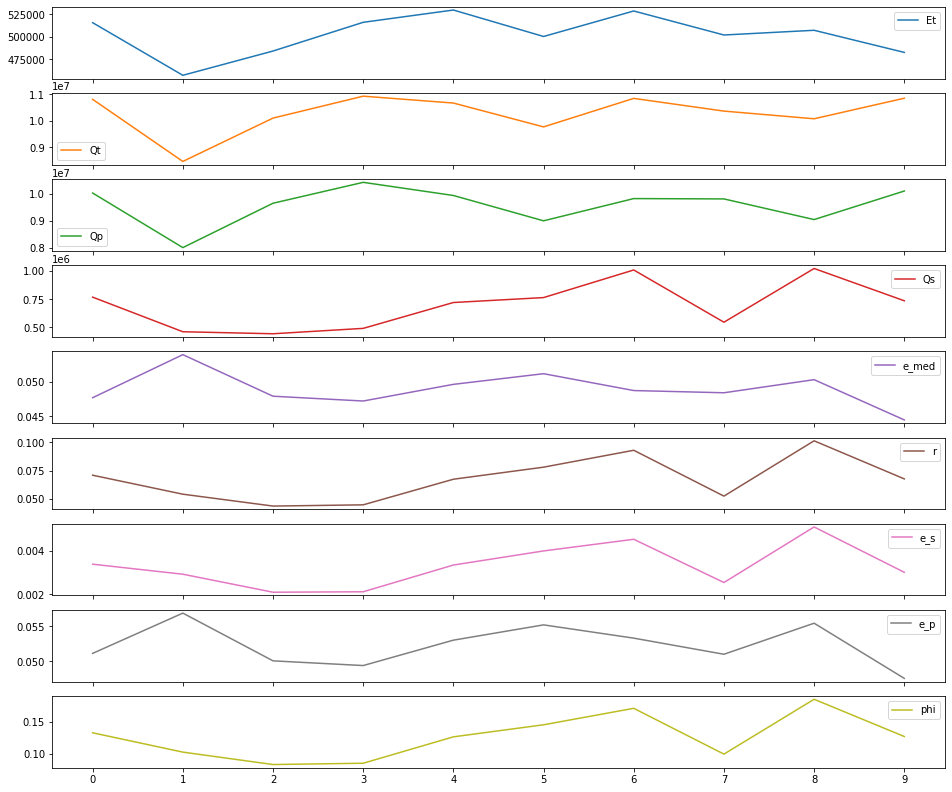

In [ ]:
df_termo.plot(figsize=(16,14),subplots=True, xticks=range(0,10))

# Abrindo outras abas

## G2-Pd

In [ ]:
path_planilha_mt = '/content/drive/MyDrive/Pesquisa/Artigo Gabriela Brito/Dados-artigo-MT-Pandas.xlsx'
df1 = pd.read_excel(path_planilha_mt, 'G2-Pd')
df1

,Periodo,Eletricidade (kWh),Biodiesel (kWh),Diesel S10 (kWh),Gasolina misturada álcool (kWh),Pintinhos Matriz (Kg),Ovos (Kg),Pintinhos (Kg),Pintinhos (Kg).1,Galinha Matriz (Kg),Adubo Orgânico (kg),Esterco (kg),CO2 (kg)
0,1.0,266800,350.595949,62961.630380,1249.791191,0.000,80626.80,79033.08,23562.00,7940.0,62380,1558960,0
1,2.0,202500,1027.669367,82222.845570,1309.194127,258.006,102068.04,77994.00,2.52,112360.0,39580,104000,0
2,3.0,250362.53,701.630886,66008.202532,782.721044,0.000,91865.88,47208.00,20109.18,0.0,0,223360,0
3,4.0,245777.7,0.000000,67029.493671,792.039152,2768.640,116551.08,55843.20,842.52,111470.0,0,0,0
4,5.0,276600,339.001519,70923.053165,719.823817,180.180,115140.60,39690.00,24174.78,102200.0,0,0,0
5,6.0,239836.28,0.000000,61192.511392,655.924894,0.000,77194.26,57750.00,5.04,57840.0,0,0,0
6,7.0,235646.77,0.000000,75378.516456,821.158238,5071.164,103902.00,40357.80,19947.90,90580.0,0,0,0
7,8.0,237537.57,0.000000,88806.881013,1154.280587,2625.672,102082.80,61597.20,9872.10,53010.0,0,0,0
8,9.0,254091.34,0.000000,83698.359494,1082.065253,0.000,106988.64,41256.60,8741.04,42420.0,0,0,0
9,10.0,-,0.000000,77008.450633,1101.866232,0.000,96287.88,80551.80,19374.18,14740.0,0,1329260,0


In [ ]:
Qp = df1.iloc[:,5]
Qp

0       0.000
1     258.006
2       0.000
3    2768.640
4     180.180
5       0.000
6    5071.164
7    2625.672
8       0.000
9       0.000
Name: Pintinhos Matriz (Kg), dtype: float64

In [ ]:
Qt = df1.iloc[:,6:].sum(axis=1)
Qt

0    1812501.88
1     436004.56
2     382543.06
3     284706.80
4     281205.38
5     192789.30
6     254787.70
7     226562.10
8     199406.28
9    1540213.86
dtype: float64

In [ ]:
Qs = Qt-Qp
Qs

0    1812501.880
1     435746.554
2     382543.060
3     281938.160
4     281025.200
5     192789.300
6     249716.536
7     223936.428
8     199406.280
9    1540213.860
dtype: float64

In [ ]:
r[1] = Qs/Qt
phi[1]= 2*r[1]/(1+r[1])
phi[1]

0    1.000000
1    0.999704
2    1.000000
3    0.995114
4    0.999680
5    1.000000
6    0.989948
7    0.994172
8    1.000000
9    1.000000
dtype: float64

## G3-Pd

In [ ]:
df2 = pd.read_excel(path_planilha_mt, 'G3-Pd')
df2

,PERIODO,Biodiesel (kWh),Diesel S10 (kWh),Gasolina misturada álcool (kWh),Eletricidade (kWh),Palha de café (Kg),Frango de Corte (Kg),Frango de Corte (Kg).1,Sucata Ferro (Kg),Sucata Papelão (Kg),Adubo Orgânico (kg),Esterco (kg),CO2 (kg)
0,1.0,28438.116456,0.000000,999.367047,258698.00,0.0,2615540,577580.0,0.0,0.0,0.0,0.0,0
1,2.0,42712.951899,0.000000,1199.706362,100923.00,1000030.0,43328,0.0,0.0,300.0,0.0,1924520.0,0
2,3.0,31036.921519,1497.721519,1097.207178,275550.96,0.0,2817213,671720.0,1260.0,0.0,0.0,0.0,0
3,4.0,28770.352405,0.000000,1390.727569,135246.30,0.0,281130,29780.0,0.0,0.0,0.0,0.0,0
4,5.0,38111.589873,258.227848,1311.523654,291921.15,0.0,3127240,734260.0,0.0,0.0,0.0,1229100.0,0
5,6.0,29005.959494,0.000000,946.952692,114558.00,0.0,337780,120360.0,0.0,0.0,0.0,1924520.0,0
6,7.0,31221.037975,0.000000,991.213703,214336.16,0.0,1985840,503180.0,0.0,0.0,0.0,1860080.0,0
7,8.0,35945.574684,0.000000,1041.298532,118451.85,0.0,1324200,259400.0,4800.0,240.0,73840.0,3440900.0,0
8,9.0,34868.506329,0.000000,819.993475,200521.60,921610.0,1489270,342240.0,0.0,0.0,0.0,0.0,0
9,10.0,61521.235443,0.000000,966.753670,161206.58,14960.0,1597080,380420.0,0.0,0.0,0.0,17940.0,0


In [ ]:
Qp = df2.iloc[:,5]
Qp

0          0.0
1    1000030.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8     921610.0
9      14960.0
Name: Palha de café (Kg), dtype: float64

In [ ]:
df2.iloc[:,6:]

,Frango de Corte (Kg),Frango de Corte (Kg).1,Sucata Ferro (Kg),Sucata Papelão (Kg),Adubo Orgânico (kg),Esterco (kg),CO2 (kg)
0,2615540,577580.0,0.0,0.0,0.0,0.0,0
1,43328,0.0,0.0,300.0,0.0,1924520.0,0
2,2817213,671720.0,1260.0,0.0,0.0,0.0,0
3,281130,29780.0,0.0,0.0,0.0,0.0,0
4,3127240,734260.0,0.0,0.0,0.0,1229100.0,0
5,337780,120360.0,0.0,0.0,0.0,1924520.0,0
6,1985840,503180.0,0.0,0.0,0.0,1860080.0,0
7,1324200,259400.0,4800.0,240.0,73840.0,3440900.0,0
8,1489270,342240.0,0.0,0.0,0.0,0.0,0
9,1597080,380420.0,0.0,0.0,0.0,17940.0,0


In [ ]:
Qt = df2.iloc[:,6:].sum(axis=1)
Qt

0    3193120.0
1    1968148.0
2    3490193.0
3     310910.0
4    5090600.0
5    2382660.0
6    4349100.0
7    5103380.0
8    1831510.0
9    1995440.0
dtype: float64

In [ ]:
Qs = Qt-Qp
Qs

0    3193120.0
1     968118.0
2    3490193.0
3     310910.0
4    5090600.0
5    2382660.0
6    4349100.0
7    5103380.0
8     909900.0
9    1980480.0
dtype: float64

In [ ]:
r[2] = Qs/Qt
phi[2]= 2*r[2]/(1+r[2])
phi[2]

0    1.000000
1    0.659421
2    1.000000
3    1.000000
4    1.000000
5    1.000000
6    1.000000
7    1.000000
8    0.663819
9    0.996237
dtype: float64

## MF1-Pd

In [ ]:
df3 = pd.read_excel(path_planilha_mt, 'MF1-Pd')
df3

,PERIODO,Eletricidade (kWh),Biodiesel (kWh),Gasolina misturada álcool (kWh),Palha de café (Kg),Frango de Corte (Kg),Frango de Corte (Kg).1,Adubo Orgânico (kg),Esterco (kg),CO2 (kg)
0,1.0,191320.88,30301.230380,583.283722,49843.917318,765720,176180.0,0.0,0.0,0
1,2.0,286386.00,32827.473418,553.093053,123932.965921,1732240,609720.0,0.0,260990.0,0
2,3.0,191539.92,25946.217722,556.715933,6192.520655,95750,21270.0,0.0,58360.0,0
3,4.0,284141.58,37806.622785,488.485022,224272.650406,3317208,920870.0,0.0,0.0,0
4,5.0,148252.89,22591.063291,463.124860,3817.539224,72140,0.0,0.0,0.0,0
5,6.0,230638.54,32522.506329,464.332487,166613.308456,2333620,814870.0,0.0,2671480.0,0
6,7.0,142054.37,26351.635443,283.792287,48141.000597,698310,211410.0,0.0,2309467.0,0
7,8.0,204583.06,24738.744304,390.667255,150671.616035,2270900,576340.0,0.0,1099420.0,0
8,9.0,153070.64,25018.405063,620.720151,69095.131545,955660,350030.0,37690.0,3475300.0,0
9,10.0,231157.84,34596.850633,275.338900,137439.349844,2008770,588420.0,0.0,557310.0,0


In [ ]:
Qp = df3.iloc[:,4]
Qp

0     49843.917318
1    123932.965921
2      6192.520655
3    224272.650406
4      3817.539224
5    166613.308456
6     48141.000597
7    150671.616035
8     69095.131545
9    137439.349844
Name: Palha de café (Kg), dtype: float64

In [ ]:
df3.iloc[:,5:]

,Frango de Corte (Kg),Frango de Corte (Kg).1,Adubo Orgânico (kg),Esterco (kg),CO2 (kg)
0,765720,176180.0,0.0,0.0,0
1,1732240,609720.0,0.0,260990.0,0
2,95750,21270.0,0.0,58360.0,0
3,3317208,920870.0,0.0,0.0,0
4,72140,0.0,0.0,0.0,0
5,2333620,814870.0,0.0,2671480.0,0
6,698310,211410.0,0.0,2309467.0,0
7,2270900,576340.0,0.0,1099420.0,0
8,955660,350030.0,37690.0,3475300.0,0
9,2008770,588420.0,0.0,557310.0,0


In [ ]:
Qt = df3.iloc[:,5:].sum(axis=1)
Qt

0     941900.0
1    2602950.0
2     175380.0
3    4238078.0
4      72140.0
5    5819970.0
6    3219187.0
7    3946660.0
8    4818680.0
9    3154500.0
dtype: float64

In [ ]:
Qs = Qt-Qp
Qs

0    8.920561e+05
1    2.479017e+06
2    1.691875e+05
3    4.013805e+06
4    6.832246e+04
5    5.653357e+06
6    3.171046e+06
7    3.795988e+06
8    4.749585e+06
9    3.017061e+06
dtype: float64

In [ ]:
r[3] = Qs/Qt
phi[3]= 2*r[3]/(1+r[3])
phi[3]

0    0.972822
1    0.975613
2    0.982028
3    0.972822
4    0.972822
5    0.985478
6    0.992466
7    0.980540
8    0.992779
9    0.977730
dtype: float64

## Abat-Pd

In [ ]:
df4 = pd.read_excel(path_planilha_mt, 'Abat-Pd')
df4

,PERIODO,Eletricidade (kWh),Biodiesel (kWh),Diesel S10 (kWh),Gasolina misturada álcool (kWh),Frango de corte (Kg),Arla (Kg),Sucata Plástico (Kg),Sucata Alumínio (Kg),Sucata Aço Inox (Kg),Sucata Papelão (Kg),Sucata Ferro (Kg),Sucata Cobre Isolado (Kg),Gordura animal (Kg),Frango (Kg),Embutidos (Kg),Óleo queimado (Kg),Gordura animal (Kg).1,Farinha de pena e vísceras (Kg),Resíduos Industriais de Origem Animal (Kg),CO2 (kg)
0,1.0,1081200.00,86730.729114,180584.931646,0.000000,0.0,3336.930000,890.0,0.0,0.0,3610.0,0.0,0.0,82048.0,2596495,0.0,0.0,48752.0,207330.6,0.0,0
1,2.0,992112.65,76203.580253,141750.742785,0.000000,56090.0,2899.932000,3950.0,1230.0,2110.0,2750.0,0.0,0.0,19372.0,1901011,0.0,0.0,107788.5,209210.6,10040.0,0
2,3.0,881167.55,125758.433924,148562.974177,259.136574,0.0,2290.050000,22470.0,130.0,0.0,1600.0,9040.0,0.0,37988.5,1930985,0.0,1280.0,92001.5,182200.0,0.0,0
3,4.0,1037835.75,117170.911899,152449.251646,1437.318108,0.0,3086.005950,1200.0,0.0,0.0,3500.0,0.0,0.0,52640.0,2539933,0.0,0.0,113050.0,228111.1,0.0,0
4,5.0,1180874.95,68311.749873,225815.398481,69.885808,86930.0,3193.507440,2880.0,0.0,0.0,6230.0,200.0,1340.0,129954.0,3010280,15548.0,1950.0,75856.0,289180.6,30360.0,0
5,6.0,1061825.10,74195.703797,141119.427342,0.000000,123390.0,1881.112500,1500.0,0.0,0.0,3600.0,610.0,0.0,80525.0,2242781,37139.0,0.0,48835.0,234910.0,2490.0,0
6,7.0,1101249.65,90905.756962,153287.226835,0.000000,118550.0,1962.900000,840.0,0.0,0.0,4600.0,0.0,0.0,105634.5,2640941,54055.0,0.0,64665.5,256050.0,0.0,0
7,8.0,1072327.20,98431.032911,174479.831392,163.066884,129760.0,3245.807820,2847.0,7440.0,0.0,0.0,400.0,0.0,69770.5,2530127,64784.0,1570.0,53559.5,227960.5,9210.0,0
8,9.0,1100149.35,94738.710380,185990.234430,69.885808,82550.0,3398.390580,1680.0,0.0,0.0,4510.0,0.0,0.0,51060.0,2809557,101800.0,0.0,94870.0,227290.0,13870.0,0
9,10.0,1233353.95,86026.102785,215480.810127,116.476346,63910.0,4206.483795,2100.0,0.0,0.0,4340.0,460.0,0.0,35067.0,3001082,153006.0,1060.0,100333.0,246620.0,13110.0,0


In [ ]:
df4.iloc[:,5:7]

,Frango de corte (Kg),Arla (Kg)
0,0.0,3336.930000
1,56090.0,2899.932000
2,0.0,2290.050000
3,0.0,3086.005950
4,86930.0,3193.507440
5,123390.0,1881.112500
6,118550.0,1962.900000
7,129760.0,3245.807820
8,82550.0,3398.390580
9,63910.0,4206.483795


In [ ]:
Qp = df4.iloc[:,5:7].sum(axis=1)
Qp

0      3336.930000
1     58989.932000
2      2290.050000
3      3086.005950
4     90123.507440
5    125271.112500
6    120512.900000
7    133005.807820
8     85948.390580
9     68116.483795
dtype: float64

In [ ]:
df4.iloc[:,7:]

,Sucata Plástico (Kg),Sucata Alumínio (Kg),Sucata Aço Inox (Kg),Sucata Papelão (Kg),Sucata Ferro (Kg),Sucata Cobre Isolado (Kg),Gordura animal (Kg),Frango (Kg),Embutidos (Kg),Óleo queimado (Kg),Gordura animal (Kg).1,Farinha de pena e vísceras (Kg),Resíduos Industriais de Origem Animal (Kg),CO2 (kg)
0,890.0,0.0,0.0,3610.0,0.0,0.0,82048.0,2596495,0.0,0.0,48752.0,207330.6,0.0,0
1,3950.0,1230.0,2110.0,2750.0,0.0,0.0,19372.0,1901011,0.0,0.0,107788.5,209210.6,10040.0,0
2,22470.0,130.0,0.0,1600.0,9040.0,0.0,37988.5,1930985,0.0,1280.0,92001.5,182200.0,0.0,0
3,1200.0,0.0,0.0,3500.0,0.0,0.0,52640.0,2539933,0.0,0.0,113050.0,228111.1,0.0,0
4,2880.0,0.0,0.0,6230.0,200.0,1340.0,129954.0,3010280,15548.0,1950.0,75856.0,289180.6,30360.0,0
5,1500.0,0.0,0.0,3600.0,610.0,0.0,80525.0,2242781,37139.0,0.0,48835.0,234910.0,2490.0,0
6,840.0,0.0,0.0,4600.0,0.0,0.0,105634.5,2640941,54055.0,0.0,64665.5,256050.0,0.0,0
7,2847.0,7440.0,0.0,0.0,400.0,0.0,69770.5,2530127,64784.0,1570.0,53559.5,227960.5,9210.0,0
8,1680.0,0.0,0.0,4510.0,0.0,0.0,51060.0,2809557,101800.0,0.0,94870.0,227290.0,13870.0,0
9,2100.0,0.0,0.0,4340.0,460.0,0.0,35067.0,3001082,153006.0,1060.0,100333.0,246620.0,13110.0,0


In [ ]:
Qt = df4.iloc[:,7:].sum(axis=1)
Qt

0    2939125.6
1    2257462.1
2    2277695.0
3    2938434.1
4    3563778.6
5    2652390.0
6    3126786.0
7    2967668.5
8    3304637.0
9    3557178.0
dtype: float64

In [ ]:
Qs = Qt-Qp
Qs

0    2.935789e+06
1    2.198472e+06
2    2.275405e+06
3    2.935348e+06
4    3.473655e+06
5    2.527119e+06
6    3.006273e+06
7    2.834663e+06
8    3.218689e+06
9    3.489062e+06
dtype: float64

In [ ]:
r[4] = Qs/Qt
phi[4]= 2*r[4]/(1+r[4])
phi[4]

0    0.999432
1    0.986761
2    0.999497
3    0.999475
4    0.987194
5    0.975814
6    0.980350
7    0.977077
8    0.986824
9    0.990333
dtype: float64

## Geral-Pd

In [ ]:
df5 = pd.read_excel(path_planilha_mt, 'Geral-Pd')
df5

,PERIODO,Biodiesel (kWh),Diesel S10 (kWh),Eletricidade (kWh),Gasolina misturada álcool (kWh),CALCARIO CALCITICO (FINO) (KG),Arla (Kg),BIOBOND (KG),CALCARIO CALCITICO (GROSSO) (KG),CASCA DE SOJA (KG),FARELO DE SOJA (KG),FARELO DE TRIGO (KG),FARINHA DE CARNE BALANCEADA (KG),FOSFATO (KG),Frango de corte (Kg),MEDICAMENTOS/AMINOACIDOS (KG),METIONINA LIQUIDA (KG),MILHO EM GRÃOS PENEIRADOS (KG),NÚCLEO PARA RAÇÃO (KG),OLEO DE SOJA DEGOMADO (KG),Palha de café (Kg),Pintinhos Matriz (Kg),SAL MOIDO (KG),SOJA EM GRAOS (KG),SORGO A GRANEL (KG),UREIA (KG),Adubo Orgânico (kg),CO2 (kg),Embutidos (Kg),Esterco (kg),Farelo de milho (Kg),Frango de Corte (Kg),Frango (Kg),Gordura animal (Kg),Óleo queimado (Kg),Ovos (Kg),Pintinhos (Kg),Ração (Kg),Resíduos Industriais de Origem Animal (Kg),Sucata Aço Inox (Kg),Sucata Alumínio (Kg),Sucata Cobre Isolado (Kg),Sucata de papelão (Kg),Sucata Plástico (Kg),Sucata Ferro (Kg)
0,1.0,260025.656203,243546.562025,2181884.53,20347.875304,104323.0,3336.930000,4740.0,98547.0,149240.0,1576134.5,50215.5,171317.5,72093.5,0.0,28526.700,30999.3,5.793992e+06,149495.0,88876.5,49843.917318,0.000,43865.5,9.639147e+05,698266.500000,11250.0,62380.0,330006.935688,0.0,1558960.0,2380.0,753760.0,2596495,82048.0,0.0,80626.80,23562.00,2469261.95,0.0,0.0,0.0,0.0,3610.0,0.0,0.0
1,2.0,261296.059747,226575.802025,1909617.03,21488.551454,74657.0,2899.932000,3750.0,78448.0,47340.5,1259916.5,47544.0,186856.5,45694.0,56090.0,21534.600,26109.5,4.685938e+06,121655.0,49145.5,123932.965921,258.006,24158.2,7.665040e+05,568744.500000,3275.0,39580.0,168348.080175,0.0,364990.0,5082.0,609720.0,1901011,19372.0,400.0,102068.04,2.52,1839607.92,10040.0,2110.0,1230.0,0.0,3050.0,2970.0,23420.0
2,3.0,295829.334684,217339.095190,1951977.29,19840.632932,85751.5,2290.050000,5270.0,86930.0,103488.5,1356828.5,42073.0,243034.0,46196.5,0.0,22627.600,32658.2,5.820610e+06,146625.0,61573.0,6192.520655,0.000,36303.3,1.132879e+06,427097.000000,7425.0,0.0,177209.858834,0.0,2206240.0,5040.0,692990.0,1930985,37988.5,1280.0,91865.88,20109.18,943545.43,0.0,0.0,130.0,0.0,1600.0,3950.0,10300.0
3,4.0,288418.092152,220418.694684,2095363.58,22145.234842,101010.5,3086.005950,6030.0,84285.0,178671.5,1420588.5,46379.0,288964.0,51502.0,0.0,27893.550,37164.7,5.787403e+06,166295.0,62788.0,224272.650406,2768.640,48126.6,1.453102e+06,660331.500000,12075.0,0.0,171386.981650,0.0,0.0,4580.0,950650.0,2539933,52640.0,0.0,116551.08,842.52,1920831.19,0.0,0.0,0.0,0.0,3500.0,22470.0,0.0
4,5.0,257070.445063,299167.239494,2277146.64,22814.586198,103397.0,3193.507440,3750.0,81943.0,166630.0,1221413.0,46473.5,228380.5,57714.5,86930.0,27315.900,34150.7,5.589680e+06,153015.0,49470.0,3817.539224,180.180,48089.0,1.493506e+06,625603.843517,14250.0,0.0,313002.297830,15548.0,1229100.0,8080.0,734260.0,3010280,129954.0,1950.0,115140.60,24174.78,1415778.98,30360.0,0.0,0.0,1340.0,6230.0,1200.0,200.0
5,6.0,262227.410127,202311.938734,2004209.50,18497.130464,86829.0,1881.112500,4630.0,80523.5,130875.5,1059249.5,39932.5,222724.5,46003.0,123390.0,26354.250,31186.7,5.091598e+06,140045.0,52911.5,166613.308456,0.000,39694.1,1.369427e+06,573063.399089,10125.0,0.0,543628.613956,37139.0,4596000.0,4020.0,935230.0,2242781,80525.0,0.0,77194.26,5.04,2600105.50,2490.0,0.0,0.0,0.0,3880.0,2880.0,610.0
6,7.0,293708.225316,228665.743291,2058704.63,20017.913657,101058.0,1962.900000,3990.0,82724.5,215405.0,1235682.5,36260.0,275959.0,49657.5,118550.0,25414.732,34995.9,5.580736e+06,155310.0,60002.0,48141.000597,5071.164,48760.3,1.274588e+06,636078.939052,13225.0,0.0,357245.706618,54055.0,4169547.0,2760.0,714590.0,2640941,105634.5,0.0,103902.00,19947.90,1432555.14,0.0,0.0,0.0,0.0,4600.0,4540.0,0.0
7,8.0,292782.943291,263485.986835,1982750.58,20974.646635,114101.5,3245.807820,4520.0,92930.5,346214.5,1185380.0,43591.0,251455.0,62947.0,129760.0,28937.316,35464.1,5.528072e+06,157940.0,61629.0,150671.616035,2625.672,59044.1,1.217968e+06,607822.657980,19325.0,73840.0,513535.882623,64784.0,4540320.0,3360.0,835740.0,2530127,69770.5,1570.0,10

In [ ]:
df5.iloc[:,5:26]

,CALCARIO CALCITICO (FINO) (KG),Arla (Kg),BIOBOND (KG),CALCARIO CALCITICO (GROSSO) (KG),CASCA DE SOJA (KG),FARELO DE SOJA (KG),FARELO DE TRIGO (KG),FARINHA DE CARNE BALANCEADA (KG),FOSFATO (KG),Frango de corte (Kg),MEDICAMENTOS/AMINOACIDOS (KG),METIONINA LIQUIDA (KG),MILHO EM GRÃOS PENEIRADOS (KG),NÚCLEO PARA RAÇÃO (KG),OLEO DE SOJA DEGOMADO (KG),Palha de café (Kg),Pintinhos Matriz (Kg),SAL MOIDO (KG),SOJA EM GRAOS (KG),SORGO A GRANEL (KG),UREIA (KG)
0,104323.0,3336.930000,4740.0,98547.0,149240.0,1576134.5,50215.5,171317.5,72093.5,0.0,28526.700,30999.3,5.793992e+06,149495.0,88876.5,49843.917318,0.000,43865.5,9.639147e+05,698266.500000,11250.0
1,74657.0,2899.932000,3750.0,78448.0,47340.5,1259916.5,47544.0,186856.5,45694.0,56090.0,21534.600,26109.5,4.685938e+06,121655.0,49145.5,123932.965921,258.006,24158.2,7.665040e+05,568744.500000,3275.0
2,85751.5,2290.050000,5270.0,86930.0,103488.5,1356828.5,42073.0,243034.0,46196.5,0.0,22627.600,32658.2,5.820610e+06,146625.0,61573.0,6192.520655,0.000,36303.3,1.132879e+06,427097.000000,7425.0
3,101010.5,3086.005950,6030.0,84285.0,178671.5,1420588.5,46379.0,288964.0,51502.0,0.0,27893.550,37164.7,5.787403e+06,166295.0,62788.0,224272.650406,2768.640,48126.6,1.453102e+06,660331.500000,12075.0
4,103397.0,3193.507440,3750.0,81943.0,166630.0,1221413.0,46473.5,228380.5,57714.5,86930.0,27315.900,34150.7,5.589680e+06,153015.0,49470.0,3817.539224,180.180,48089.0,1.493506e+06,625603.843517,14250.0
5,86829.0,1881.112500,4630.0,80523.5,130875.5,1059249.5,39932.5,222724.5,46003.0,123390.0,26354.250,31186.7,5.091598e+06,140045.0,52911.5,166613.308456,0.000,39694.1,1.369427e+06,573063.399089,10125.0
6,101058.0,1962.900000,3990.0,82724.5,215405.0,1235682.5,36260.0,275959.0,49657.5,118550.0,25414.732,34995.9,5.580736e+06,155310.0,60002.0,48141.000597,5071.164,48760.3,1.274588e+06,636078.939052,13225.0
7,114101.5,3245.807820,4520.0,92930.5,346214.5,1185380.0,43591.0,251455.0,62947.0,129760.0,28937.316,35464.1,5.528072e+06,157940.0,61629.0,150671.616035,2625.672,59044.1,1.217968e+06,607822.657980,19325.0
8,104616.5,3398.390580,3870.0,76716.5,82429.0,1291497.0,51086.0,264575.0,50907.5,82550.0,26735.032,33297.0,5.009880e+06,146130.0,59557.0,69095.131545,0.000,54114.3,1.184336e+06,591038.904899,20500.0
9,116558.5,4206.483795,3920.0,88032.5,291233.5,1413247.5,49595.5,281608.0,60065.5,63910.0,27991.376,35798.8,5.523602e+06,160625.0,66609.0,137439.349844,0.000,55868.3,1.274478e+06,636023.754443,25050.0


In [ ]:
Qp = df5.iloc[:,5:26].sum(axis=1)
Qp

0    1.008898e+07
1    8.194451e+06
2    9.665852e+06
3    1.066274e+07
4    1.003890e+07
5    9.297058e+06
6    1.000357e+07
7    1.010364e+07
8    9.206330e+06
9    1.031586e+07
dtype: float64

In [ ]:
df5.iloc[:,26:]

,Adubo Orgânico (kg),CO2 (kg),Embutidos (Kg),Esterco (kg),Farelo de milho (Kg),Frango de Corte (Kg),Frango (Kg),Gordura animal (Kg),Óleo queimado (Kg),Ovos (Kg),Pintinhos (Kg),Ração (Kg),Resíduos Industriais de Origem Animal (Kg),Sucata Aço Inox (Kg),Sucata Alumínio (Kg),Sucata Cobre Isolado (Kg),Sucata de papelão (Kg),Sucata Plástico (Kg),Sucata Ferro (Kg)
0,62380.0,330006.935688,0.0,1558960.0,2380.0,753760.0,2596495,82048.0,0.0,80626.80,23562.00,2469261.95,0.0,0.0,0.0,0.0,3610.0,0.0,0.0
1,39580.0,168348.080175,0.0,364990.0,5082.0,609720.0,1901011,19372.0,400.0,102068.04,2.52,1839607.92,10040.0,2110.0,1230.0,0.0,3050.0,2970.0,23420.0
2,0.0,177209.858834,0.0,2206240.0,5040.0,692990.0,1930985,37988.5,1280.0,91865.88,20109.18,943545.43,0.0,0.0,130.0,0.0,1600.0,3950.0,10300.0
3,0.0,171386.981650,0.0,0.0,4580.0,950650.0,2539933,52640.0,0.0,116551.08,842.52,1920831.19,0.0,0.0,0.0,0.0,3500.0,22470.0,0.0
4,0.0,313002.297830,15548.0,1229100.0,8080.0,734260.0,3010280,129954.0,1950.0,115140.60,24174.78,1415778.98,30360.0,0.0,0.0,1340.0,6230.0,1200.0,200.0
5,0.0,543628.613956,37139.0,4596000.0,4020.0,935230.0,2242781,80525.0,0.0,77194.26,5.04,2600105.50,2490.0,0.0,0.0,0.0,3880.0,2880.0,610.0
6,0.0,357245.706618,54055.0,4169547.0,2760.0,714590.0,2640941,105634.5,0.0,103902.00,19947.90,1432555.14,0.0,0.0,0.0,0.0,4600.0,4540.0,0.0
7,73840.0,513535.882623,64784.0,4540320.0,3360.0,835740.0,2530127,69770.5,1570.0,102082.80,9872.10,2134915.89,9210.0,0.0,7440.0,0.0,240.0,2420.0,7860.0
8,37690.0,181605.946203,101800.0,3475300.0,3400.0,692270.0,2809557,51060.0,0.0,106988.64,8741.04,1930598.97,13870.0,0.0,0.0,0.0,4510.0,5107.0,0.0
9,0.0,304524.013694,153006.0,1904510.0,7880.0,968840.0,3001082,35067.0,2800.0,96287.88,19374.18,2356636.76,13110.0,0.0,0.0,0.0,4340.0,4480.0,460.0


In [ ]:
Qt = df5.iloc[:,26:].sum(axis=1)
Qt

0    7.963091e+06
1    5.093002e+06
2    6.123234e+06
3    5.783385e+06
4    7.036599e+06
5    1.112649e+07
6    9.610318e+06
7    1.090709e+07
8    9.422499e+06
9    8.872398e+06
dtype: float64

In [ ]:
Qs = Qt-Qp
Qs

0   -2.125887e+06
1   -3.101450e+06
2   -3.542618e+06
3   -4.879352e+06
4   -3.002304e+06
5    1.829431e+06
6   -3.932538e+05
7    8.034438e+05
8    2.161688e+05
9   -1.443464e+06
dtype: float64

## Gráfico do indicador de circularidade por setor

In [ ]:
df_indicadores = pd.DataFrame({'Período': range(1,11), 'Fab-Pd':phi[0], 'G2-Pd':phi[1], 'G3-Pd':phi[2], 'MF1-Pd':phi[3], 'Abat-Pd':phi[4]})
df_indicadores

,Período,Fab-Pd,G2-Pd,G3-Pd,MF1-Pd,Abat-Pd
0,1,0.132661,1.000000,1.000000,0.972822,0.999432
1,2,0.102917,0.999704,0.659421,0.975613,0.986761
2,3,0.083798,1.000000,1.000000,0.982028,0.999497
3,4,0.085802,0.995114,1.000000,0.972822,0.999475
4,5,0.126434,0.999680,1.000000,0.972822,0.987194
5,6,0.144997,1.000000,1.000000,0.985478,0.975814
6,7,0.170367,0.989948,1.000000,0.992466,0.980350
7,8,0.099838,0.994172,1.000000,0.980540,0.977077
8,9,0.184298,1.000000,0.663819,0.992779,0.986824
9,10,0.126963,1.000000,0.996237,0.977730,0.990333


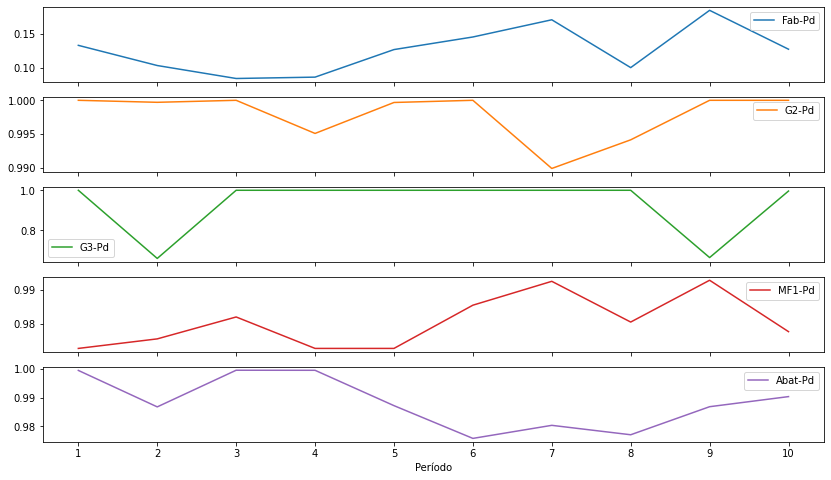

In [ ]:
df_indicadores.plot(x='Período', xticks=range(1,11), figsize=(14,8), subplots=True);